# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
"""
from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter"""

'\nfrom plotly import plotly\nimport plotly.offline as offline\nimport plotly.graph_objs as go\noffline.init_notebook_mode()\nfrom collections import Counter'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_data.csv')
resource_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:

sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:00<00:00, 1804.47it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also
# printing some random project_title.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Inspiring Minds by Enhancing the Educational Experience


In [20]:
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 39772.10it/s]


In [21]:
preprocessed_project_title[99999]

'inspiring minds enhancing educational experience'

In [0]:
#upperCase to lowercase
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
#removing puntuation from the column
#https://stackoverflow.com/questions/39782418/remove-punctuations-in-pandas
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('[^\w\s]','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')

In [0]:
#Teacher Prefix

#upperCase to lowercase
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
#removing puntuation from the column
#https://stackoverflow.com/questions/39782418/remove-punctuations-in-pandas
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('[^\w\s]','')


In [24]:
#upperCase to lowercase
project_data['school_state'] = project_data['school_state'].str.lower()
project_data.school_state.value_counts()

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

## 1.5 Preparing data for models

In [25]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [26]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [27]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [28]:
#project_grade_category

vectorizer = CountVectorizer(vocabulary=list(project_data['project_grade_category'].unique()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())
project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)

['grades_prek_2', 'grades_6_8', 'grades_3_5', 'grades_9_12']
Shape of matrix after one hot encodig  (109248, 4)


In [29]:
#state
vectorizer = CountVectorizer(vocabulary=list(project_data['school_state'].unique()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot.shape)

['in', 'fl', 'az', 'ky', 'tx', 'ct', 'ga', 'sc', 'nc', 'ca', 'ny', 'ok', 'ma', 'nv', 'oh', 'pa', 'al', 'la', 'va', 'ar', 'wa', 'wv', 'id', 'tn', 'ms', 'co', 'ut', 'il', 'mi', 'hi', 'ia', 'ri', 'nj', 'mo', 'de', 'mn', 'me', 'wy', 'nd', 'or', 'ak', 'md', 'wi', 'sd', 'ne', 'nm', 'dc', 'ks', 'mt', 'nh', 'vt']
Shape of matrix after one hot encodig  (109248, 51)


In [0]:
# Before converting to vecter we have to remove NA values from the column , we are filling the value by column mode 
project_data['teacher_prefix'].fillna(project_data.teacher_prefix.mode()[0],inplace=True)

In [31]:
#teacher_prefix
vectorizer = CountVectorizer(vocabulary=list(project_data['teacher_prefix'].unique()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())
teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['mrs', 'mr', 'ms', 'teacher', 'dr']
Shape of matrix after one hot encodig  (109248, 5)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [32]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vectorizer = CountVectorizer(min_df=10,max_features=5000,ngram_range=(2,2))
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 5000)


In [33]:
#preprocessed_project_title
vectorizer = CountVectorizer(min_df=10,max_features=5000,ngram_range=(2,2))
project_title_bow = vectorizer.fit_transform(preprocessed_project_title)
print("Shape of matrix after one hot encodig ",project_title_bow.shape)

Shape of matrix after one hot encodig  (109248, 4249)


#### 1.5.2.2 TFIDF vectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(2,2))
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 5000)


In [35]:
vectorizer = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(2,2))
project_title_tfidf = vectorizer.fit_transform(preprocessed_project_title)
print("Shape of matrix after one hot encodig ",project_title_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 4249)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/content/drive/My Drive/Colab Notebooks/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [37]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 109248/109248 [00:39<00:00, 2782.35it/s]

109248
300


In [38]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title.append(vector)
print()
print(len(avg_w2v_vectors_project_title))
print(len(avg_w2v_vectors_project_title[0]))

100%|██████████| 109248/109248 [00:02<00:00, 52566.24it/s]


109248
300


#### 1.5.2.4 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [40]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)
print()
print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 109248/109248 [04:13<00:00, 430.17it/s]


109248
300


In [41]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_pro_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pro_title.append(vector)
print()
print(len(avg_w2v_vectors_pro_title))
print(len(avg_w2v_vectors_pro_title[0]))

100%|██████████| 109248/109248 [00:02<00:00, 47959.07it/s]


109248
300


### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [43]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [44]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

In [45]:
previously_posted_scalar = StandardScaler()
previously_posted_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previously_posted_standardized = previously_posted_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [46]:
previously_posted_standardized

array([[-0.40152481],
       [-0.14951799],
       [-0.36552384],
       ...,
       [-0.29352189],
       [-0.40152481],
       [-0.40152481]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [47]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 5000)
(109248, 1)


In [0]:
y = project_data['project_is_approved']

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack


In [50]:
#BoW dataset
X_BoW = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized,previously_posted_standardized,
                project_grade_category_one_hot,state_one_hot ,project_title_bow,teacher_prefix_one_hot))
X_BoW.shape

(109248, 9350)

In [51]:
#TFIDF dataset
X_tfidf = hstack((categories_one_hot, sub_categories_one_hot, text_tfidf, price_standardized,previously_posted_standardized,
            project_grade_category_one_hot,state_one_hot ,project_title_tfidf,teacher_prefix_one_hot))
X_tfidf.shape

(109248, 9350)

In [52]:
#AVG W2V dataset
X_avg_w2v = hstack((categories_one_hot, sub_categories_one_hot, avg_w2v_vectors, price_standardized,previously_posted_standardized,     
            project_grade_category_one_hot,state_one_hot ,avg_w2v_vectors_pro_title,teacher_prefix_one_hot))
X_avg_w2v.shape

(109248, 701)

In [53]:
#TFIDF W2V
X_tfidf_w2v = hstack((categories_one_hot, sub_categories_one_hot, tfidf_w2v_vectors, price_standardized,previously_posted_standardized,
                 project_grade_category_one_hot,state_one_hot ,avg_w2v_vectors_pro_title,teacher_prefix_one_hot))
X_tfidf_w2v.shape

(109248, 701)

# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

#2. Logistic Regression

##2.1 Splitting data into Train and cross validation(or test): Stratified Sampling

In [0]:
# Bow
from sklearn.model_selection import train_test_split
X_train_Bow, X_test_Bow, y_train_Bow, y_test_Bow = train_test_split(X_BoW, y, test_size=0.33, stratify=y)
#X_train_Bow, X_cv_Bow, y_train_Bow, y_cv_Bow = train_test_split(X_train_Bow, y_train_Bow, test_size=0.33, stratify=y_train_Bow)

In [0]:
# tfidf
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.33, stratify=y)
#X_train_tfidf, X_cv_tfidf, y_train_tfidf, y_cv_tfidf = train_test_split(X_train_tfidf, y_train_tfidf, test_size=0.33, stratify=y_train_tfidf)

In [0]:
#X_avg_w2v

X_train_avg_w2v, X_test_avg_w2v, y_train_avg_w2v, y_test_avg_w2v = train_test_split(X_avg_w2v, y, test_size=0.33, stratify=y)
#X_train_avg_w2v, X_cv_avg_w2v, y_train_avg_w2v, y_cv_avg_w2v = train_test_split(X_train_avg_w2v, y_train_avg_w2v, test_size=0.33, stratify=y_train_avg_w2v)


In [0]:
# X_tfidf_w2v
X_train_tfidf_w2v, X_test_tfidf_w2v, y_train_tfidf_w2v, y_test_tfidf_w2v = train_test_split(X_tfidf_w2v, y, test_size=0.33, stratify=y)
#X_train_tfidf_w2v, X_cv_tfidf_w2v, y_train_tfidf_w2v, y_cv_tfidf_w2v = train_test_split(X_train_tfidf_w2v, y_train_tfidf_w2v, test_size=0.33, stratify=y_train_tfidf_w2v)

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("The maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

##2.2 Make Data Model Ready: encoding numerical, categorical features

### 2.2.1 Bag of words

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


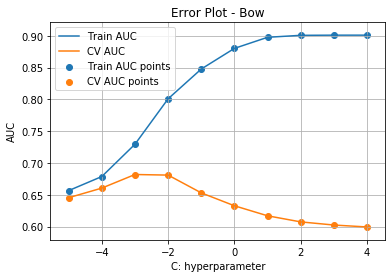

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import math
C = [10**x for x in range(-5,5)]
tuned_parameters = [{'C': C}]


model = GridSearchCV(LogisticRegression(class_weight='balanced'), tuned_parameters, scoring = 'roc_auc', cv=3,return_train_score = True)
model.fit(X_train_Bow, y_train_Bow)

print(model.best_estimator_)

results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
C =  results['param_C']

C = [math.log(x,10) for x in C]
plt.plot(C, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(C, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Error Plot - Bow")
plt.grid()
plt.show()


### 2.2.2 TF-idf


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


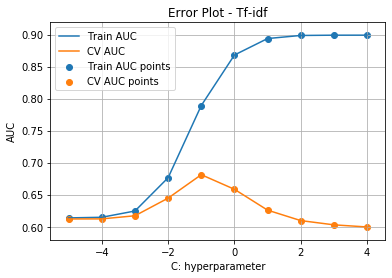

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


import math
C = [10**x for x in range(-5,5)]
tuned_parameters = [{'C': C}]

model = GridSearchCV(LogisticRegression(class_weight = 'balanced'), tuned_parameters, scoring = 'roc_auc', cv=3,return_train_score = True)
model.fit(X_train_tfidf, y_train_tfidf)

print(model.best_estimator_)

results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
C =  results['param_C']

C = [math.log(x,10) for x in C]
plt.plot(C, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(C, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Error Plot - Tf-idf")
plt.grid()
plt.show()

### 2.2.3 Avg  W2V


LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


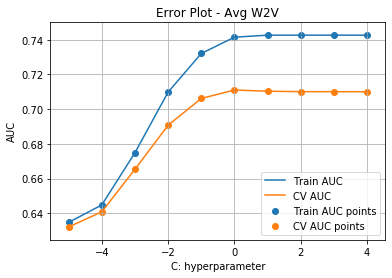

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import math
C = [10**x for x in range(-5,5)]
tuned_parameters = [{'C': C}]

model = GridSearchCV(LogisticRegression(class_weight = 'balanced'), tuned_parameters, scoring = 'roc_auc', cv=3,return_train_score = True)
model.fit(X_train_avg_w2v, y_train_avg_w2v)


print(model.best_estimator_)


results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
C =  results['param_C']

C = [math.log(x,10) for x in C]
plt.plot(C, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(C, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Error Plot - Avg W2V")
plt.grid()
plt.show()

### 2.2.4 TFIDF W2V

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


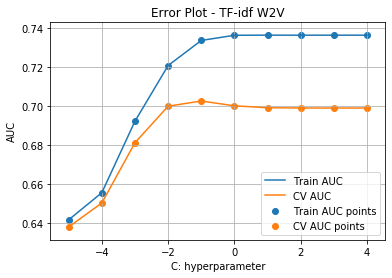

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression


import math
C = [10**x for x in range(-5,5)]
tuned_parameters = [{'C': C}]

model = GridSearchCV(LogisticRegression(class_weight = 'balanced'), tuned_parameters, scoring = 'roc_auc', cv=3,return_train_score = True)
model.fit(X_train_tfidf_w2v, y_train_tfidf_w2v)


print(model.best_estimator_)

results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
C =  results['param_C']

C = [math.log(x,10) for x in C]
plt.plot(C, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(C, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Error Plot - TF-idf W2V")
plt.grid()
plt.show()

### 2.2.5 LR With best parameter

In [0]:
Best_C_bow = 0.001
Best_C_tfidf = 0.1
Best_C_Avg_w2v = 1
Best_C_tfidf_w2v = 8.551

#### 2.2.5.1 Bag of word

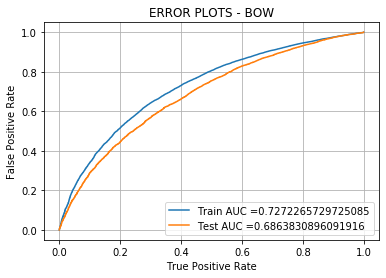

In [65]:
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(C = Best_C_bow,class_weight = 'balanced')     
classifer.fit(X_train_Bow.toarray(), y_train_Bow)

y_train_pred = batch_predict(classifer, X_train_Bow)    
y_test_pred = batch_predict(classifer, X_test_Bow)

train_fpr_bow, train_tpr_bow, tr_thresholds_bow = roc_curve(y_train_Bow, y_train_pred)
test_fpr_bow, test_tpr_bow, te_thresholds_bow = roc_curve(y_test_Bow, y_test_pred)


plt.plot(train_fpr_bow, train_tpr_bow, label="Train AUC ="+str(auc(train_fpr_bow, train_tpr_bow)))
plt.plot(test_fpr_bow, test_tpr_bow, label="Test AUC ="+str(auc(test_fpr_bow, test_tpr_bow)))
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ERROR PLOTS - BOW")
plt.grid()
plt.show()

The maximum value of tpr*(1-fpr) 0.45012259681686434 for threshold 0.503
Train confusion matrix for BOW


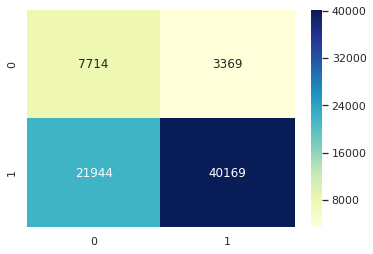

In [66]:
import seaborn as sns; sns.set()
best_t = find_best_threshold(tr_thresholds_bow, train_fpr_bow, train_tpr_bow)
print("="*50)
print("Train confusion matrix for BOW")
print("="*50)

#https://seaborn.pydata.org/generated/seaborn.heatmap.html
uniform_data = confusion_matrix(y_train_Bow, predict_with_best_t(y_train_pred, best_t))
ax = sns.heatmap(uniform_data,cmap="YlGnBu",annot=True,fmt="d")

Test confusion matrix for BOW


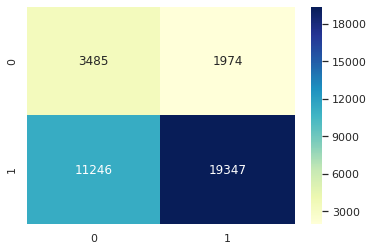

In [67]:
print("="*50)
print("Test confusion matrix for BOW")
print("="*50)

uniform_data = confusion_matrix(y_test_Bow, predict_with_best_t(y_test_pred, best_t))
ax = sns.heatmap(uniform_data,cmap="YlGnBu",annot=True,fmt="d")

#### 2.2.5.2 Tf-idf

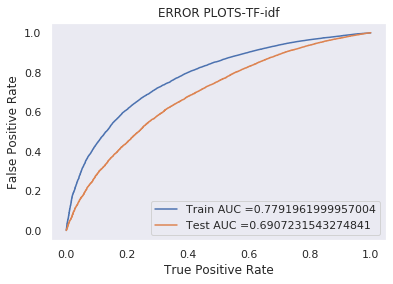

In [68]:
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(C = Best_C_tfidf,class_weight = 'balanced')     
classifer.fit(X_train_tfidf.toarray(), y_train_tfidf)

y_train_pred = batch_predict(classifer, X_train_tfidf)    
y_test_pred = batch_predict(classifer, X_test_tfidf)


train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train_tfidf, y_train_pred)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test_tfidf, y_test_pred)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="Train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="Test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ERROR PLOTS-TF-idf")
plt.grid()
plt.show()

The maximum value of tpr*(1-fpr) 0.5054888834943058 for threshold 0.498
Train confusion matrix for TF-idf


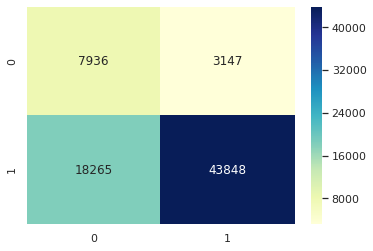

In [69]:
best_t = find_best_threshold(tr_thresholds_tfidf, train_fpr_tfidf, train_tpr_tfidf)
print("="*50)
print("Train confusion matrix for TF-idf")
print("="*50)
uniform_data = confusion_matrix(y_train_tfidf, predict_with_best_t(y_train_pred, best_t))
ax = sns.heatmap(uniform_data,cmap="YlGnBu",annot=True,fmt="d")

Test confusion matrix for TF-idf


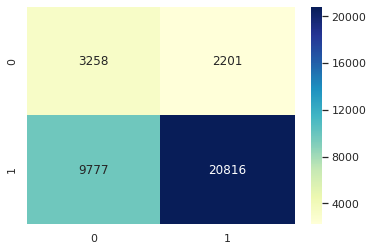

In [70]:
print("="*50)
print("Test confusion matrix for TF-idf")
print("="*50)


uniform_data = confusion_matrix(y_test_tfidf, predict_with_best_t(y_test_pred, best_t))
ax = sns.heatmap(uniform_data,cmap="YlGnBu",annot=True,fmt="d")

#### 2.2.5.3 Avg W2V


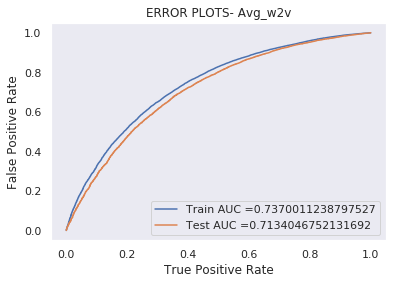

In [71]:
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(C = Best_C_Avg_w2v,class_weight = 'balanced')     
classifer.fit(X_train_avg_w2v.toarray(), y_train_avg_w2v)

y_train_pred = batch_predict(classifer, X_train_avg_w2v)    
y_test_pred = batch_predict(classifer, X_test_avg_w2v)


train_fpr_Avg_w2v, train_tpr_Avg_w2v, tr_thresholds_Avg_w2v = roc_curve(y_train_avg_w2v, y_train_pred)
test_fpr_Avg_w2v, test_tpr_Avg_w2v, te_thresholds_Avg_w2v = roc_curve(y_test_avg_w2v, y_test_pred)

plt.plot(train_fpr_Avg_w2v, train_tpr_Avg_w2v, label="Train AUC ="+str(auc(train_fpr_Avg_w2v, train_tpr_Avg_w2v)))
plt.plot(test_fpr_Avg_w2v, test_tpr_Avg_w2v, label="Test AUC ="+str(auc(test_fpr_Avg_w2v, test_tpr_Avg_w2v)))
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ERROR PLOTS- Avg_w2v")
plt.grid()
plt.show()

The maximum value of tpr*(1-fpr) 0.45827394518022246 for threshold 0.49
Train confusion matrix for TF-idf


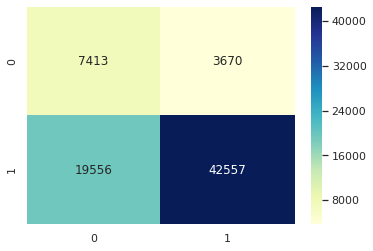

In [72]:
best_t = find_best_threshold(tr_thresholds_Avg_w2v, train_fpr_Avg_w2v, train_tpr_Avg_w2v)
print("="*50)
print("Train confusion matrix for TF-idf")
print("="*50)
uniform_data = confusion_matrix(y_train_avg_w2v, predict_with_best_t(y_train_pred, best_t))
ax = sns.heatmap(uniform_data,cmap="YlGnBu",annot=True,fmt="d")

Test confusion matrix for TF-idf


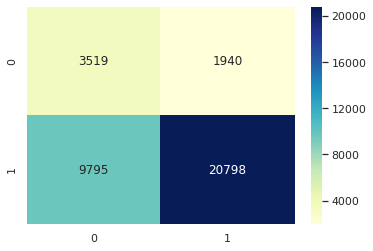

In [73]:
print("="*50)
print("Test confusion matrix for TF-idf")
print("="*50)

uniform_data = confusion_matrix(y_test_avg_w2v, predict_with_best_t(y_test_pred, best_t))
ax = sns.heatmap(uniform_data,cmap="YlGnBu",annot=True,fmt="d")

#### 2.2.5.4 TFIDF W2V

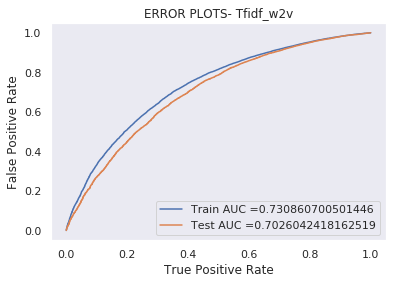

In [74]:
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(C = Best_C_tfidf_w2v,class_weight = 'balanced')     
classifer.fit(X_train_tfidf_w2v.toarray(), y_train_tfidf_w2v)

y_train_pred = batch_predict(classifer, X_train_tfidf_w2v)    
y_test_pred = batch_predict(classifer, X_test_tfidf_w2v)


train_fpr_tfidf_w2v, train_tpr_tfidf_w2v, tr_thresholds_tfidf_w2v = roc_curve(y_train_tfidf_w2v, y_train_pred)
test_fpr_tfidf_w2v, test_tpr_tfidf_w2v, te_thresholds_tfidf_w2v = roc_curve(y_test_tfidf_w2v, y_test_pred)

plt.plot(train_fpr_tfidf_w2v, train_tpr_tfidf_w2v, label="Train AUC ="+str(auc(train_fpr_tfidf_w2v, train_tpr_tfidf_w2v)))
plt.plot(test_fpr_tfidf_w2v, test_tpr_tfidf_w2v, label="Test AUC ="+str(auc(test_fpr_tfidf_w2v, test_tpr_tfidf_w2v)))
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ERROR PLOTS- Tfidf_w2v")
plt.grid()
plt.show()

The maximum value of tpr*(1-fpr) 0.45509201874515165 for threshold 0.471
Train confusion matrix for Tfidf_w2v


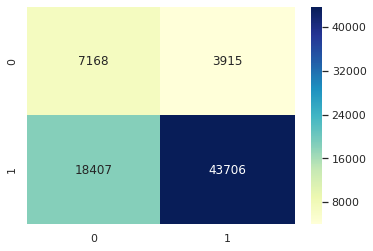

In [75]:
best_t = find_best_threshold(tr_thresholds_tfidf_w2v, train_fpr_tfidf_w2v, train_tpr_tfidf_w2v)
print("="*50)
print("Train confusion matrix for Tfidf_w2v")
print("="*50)
uniform_data = confusion_matrix(y_train_tfidf_w2v, predict_with_best_t(y_train_pred, best_t))
ax = sns.heatmap(uniform_data,cmap="YlGnBu",annot=True,fmt="d")

Test confusion matrix for TF-idf


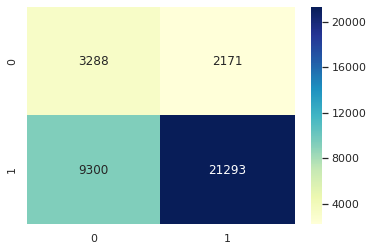

In [76]:
print("="*50)
print("Test confusion matrix for TF-idf")
print("="*50)

uniform_data = confusion_matrix(y_test_tfidf_w2v, predict_with_best_t(y_test_pred, best_t))
ax = sns.heatmap(uniform_data,cmap="YlGnBu",annot=True,fmt="d")

##2.4 Appling Logistic Regression on different kind of featurization as mentioned in the instructions

<br>Apply Logistic Regression on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### 2.4.1 Computing Sentiment Scores

In [77]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = "a person is a person "
ss = sid.polarity_scores(for_sentiment)

sentiment_score_essay =[]

for sent in tqdm(preprocessed_essays):
  score = []
  ss = sid.polarity_scores(sent)
  score.append(ss['compound']) 
  score.append(ss['neg']) 
  score.append(ss['neu']) 
  score.append(ss['pos']) 
  sentiment_score_essay.append(score)

#sent {'compound': 0.9975, 'neg': 0.01, 'neu': 0.745, 'pos': 0.245}

  0%|          | 0/109248 [00:00<?, ?it/s]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


100%|██████████| 109248/109248 [03:32<00:00, 513.99it/s]


In [0]:
sentiment_score_essay= np.array(sentiment_score_essay).reshape(-1,4)

In [79]:
sentiment_score_essay

array([[0.9694, 0.012 , 0.844 , 0.144 ],
       [0.9856, 0.048 , 0.669 , 0.283 ],
       [0.9816, 0.122 , 0.659 , 0.219 ],
       ...,
       [0.995 , 0.    , 0.601 , 0.399 ],
       [0.9938, 0.02  , 0.659 , 0.321 ],
       [0.9868, 0.059 , 0.693 , 0.248 ]])

### 2.4.2 count no of words in eassay 

In [80]:
no_of_words_essay =[]
for sent in tqdm(preprocessed_essays):
  count = len(sent.split())
  no_of_words_essay.append(count)

100%|██████████| 109248/109248 [00:01<00:00, 106211.52it/s]


In [0]:
no_of_words_essay = np.array(no_of_words_essay).reshape(-1,1)

In [82]:
no_of_words_essay

array([[161],
       [109],
       [202],
       ...,
       [110],
       [147],
       [158]])

 ### 2.4.3 count no of words in Project Title

In [83]:
no_of_words_project_title =[]
for sent in tqdm(preprocessed_project_title):
  count = len(sent.split())
  no_of_words_project_title.append(count)

100%|██████████| 109248/109248 [00:00<00:00, 872408.20it/s]


In [0]:
no_of_words_project_title= np.array(no_of_words_project_title).reshape(-1,1)

In [85]:
no_of_words_project_title

array([[5],
       [4],
       [6],
       ...,
       [5],
       [4],
       [6]])

### 2.4.4 Combining features

In [86]:
X_sentiment = hstack((categories_one_hot, sub_categories_one_hot,  price_standardized,previously_posted_standardized,
                project_grade_category_one_hot,state_one_hot ,teacher_prefix_one_hot,
                no_of_words_essay,
                no_of_words_project_title,
                sentiment_score_essay))
X_sentiment.shape

(109248, 107)

###2.4.5 Spliting the dataset into train test and cv

In [0]:
# train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sentiment, y, test_size=0.33, stratify=y)

##2.5 Logistic Regression with added Features `Set 5` </h2>

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


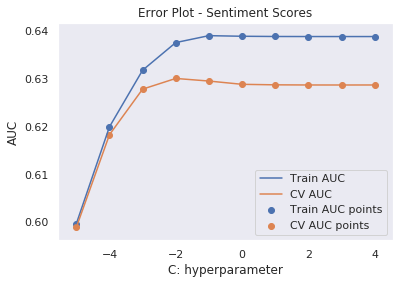

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


import math
C = [10**x for x in range(-5,5)]
tuned_parameters = [{'C': C}]

model = GridSearchCV(LogisticRegression(class_weight = 'balanced'), tuned_parameters, scoring = 'roc_auc', cv=3,return_train_score = True)
model.fit(X_train, y_train)


print(model.best_estimator_)


results = pd.DataFrame.from_dict(model.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
C =  results['param_C']

C = [math.log(x,10) for x in C]

plt.plot(C, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(C, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Error Plot - Sentiment Scores")
plt.grid()
plt.show()

### 2.5.1 With Best C

In [0]:
Best_C =  0.01

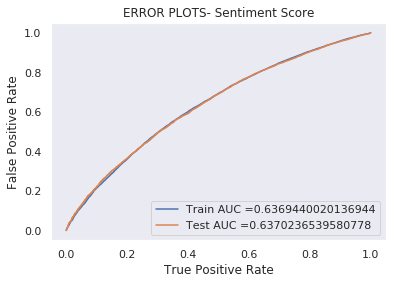

In [90]:
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(C = Best_C,class_weight = 'balanced')     
classifer.fit(X_train.toarray(), y_train)

y_train_pred = batch_predict(classifer, X_train)    
y_test_pred = batch_predict(classifer, X_test)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ERROR PLOTS- Sentiment Score")
plt.grid()
plt.show()

The maximum value of tpr*(1-fpr) 0.36135953771616885 for threshold 0.495
Train confusion matrix


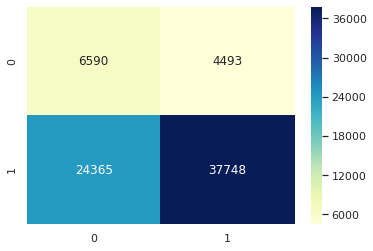

In [91]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("="*50)
print("Train confusion matrix")
print("="*50)
uniform_data = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
ax = sns.heatmap(uniform_data,cmap="YlGnBu",annot=True,fmt="d")

Test confusion matrix for TF-idf


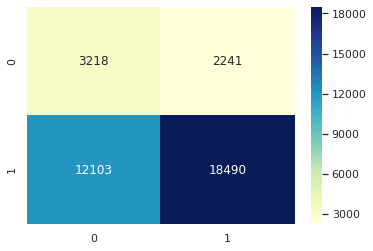

In [92]:
print("="*50)
print("Test confusion matrix for TF-idf")
print("="*50)

uniform_data = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
ax = sns.heatmap(uniform_data,cmap="YlGnBu",annot=True,fmt="d")

#3. Conclusion

In [93]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "HyperParameter", "AUC_Train","AUC_Test"]
x.add_row(["Bag of Words", "LogisticRegression", Best_C_bow, str(auc(train_fpr_bow, train_tpr_bow)),str(auc(test_fpr_bow, test_tpr_bow))])
x.add_row(["TF-idf", "LogisticRegression", Best_C_tfidf,  str(auc(train_fpr_tfidf, train_tpr_tfidf)),str(auc(test_fpr_tfidf, test_tpr_tfidf))])
x.add_row(["Avg W2V", "LogisticRegression", Best_C_Avg_w2v,  str(auc(train_fpr_Avg_w2v, train_tpr_Avg_w2v)),str(auc(test_fpr_Avg_w2v, test_tpr_Avg_w2v))])
x.add_row(["TF-idf W2V", "LogisticRegression", Best_C_tfidf_w2v,str(auc(train_fpr_tfidf_w2v, train_tpr_tfidf_w2v)),str(auc(test_fpr_tfidf_w2v, test_tpr_tfidf_w2v))])
x.add_row(["Sentiment Scores", "LogisticRegression", Best_C, str(auc(train_fpr, train_tpr)),str(auc(test_fpr, test_tpr))])
print(x)

+------------------+--------------------+----------------+--------------------+--------------------+
|    Vectorizer    |       Model        | HyperParameter |     AUC_Train      |      AUC_Test      |
+------------------+--------------------+----------------+--------------------+--------------------+
|   Bag of Words   | LogisticRegression |     0.001      | 0.7272265729725085 | 0.6863830896091916 |
|      TF-idf      | LogisticRegression |      0.1       | 0.7791961999957004 | 0.6907231543274841 |
|     Avg W2V      | LogisticRegression |       1        | 0.7370011238797527 | 0.7134046752131692 |
|    TF-idf W2V    | LogisticRegression |     8.551      | 0.730860700501446  | 0.7026042418162519 |
| Sentiment Scores | LogisticRegression |      0.01      | 0.6369440020136944 | 0.6370236539580778 |
+------------------+--------------------+----------------+--------------------+--------------------+
